In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Expectation ##

Let $X$ have density $f$. Let $g$ be a real valued function on the real line, and suppose you want to find $E(g(X))$. Then you can follow a procedure analogous to the non-linear function rule we developed for finding expectations of functions of discrete random variables.

- Write a generic value of $X$: that's $x$.
- Apply the function $g$ to get $g(x)$.
- Weight $g(x)$ by the chance that $X$ is *just around $x$*, resulting in the product $g(x) \cdot f(x)dx$.
- "Sum" over all $x$, that is, integrate.

The expectation is
$$
E(g(X)) ~ = ~ \int_{-\infty}^{\infty} g(x)\cdot f(x)dx
$$

**Technical Note:** We must be careful here as $g$ is an arbitrary function and the integral above need not exist. If $g$ is non-negative, then the integral is either finite or diverges to $+\infty$, but it doesn't oscillate. So if $g$ is non-negative, define

$$
E(g(X)) ~ = ~ \int_{-\infty}^{\infty} g(x)\cdot f(x)dx ~~~
\text{provided the integral is finite.}
$$

For a general $g$, first check whether $E(\lvert g(X) \rvert )$ is finite, that is, whether

$$
\int_{-\infty}^{\infty} \lvert g(x) \rvert \cdot f(x)dx ~ < ~ \infty
$$

If it is finite then there is a theorem that says $\int_{-\infty}^{\infty} g(x)\cdot f(x)dx $ exists, so it makes sense to define

$$
E(g(X)) ~ = ~ \int_{-\infty}^{\infty} g(x)\cdot f(x)dx 
$$

**Non-technical Note:** In almost all of our examples, we will not be faced with questions about the existence of integrals. For example, if the set of possible values of $g(X)$ is bounded, then its expectation exists. But we will see a few examples of random variables that don't have expectations. Such random variables have "heavy tails" and are important in many applications.

All the properties of means, variances, and covariances that we proved for discrete variables are still true. The proofs need to be rewritten for random variables with densities, but we won't take the time to do that. Just use the properties as you did before. The Central Limit Theorem holds as well.

### Uniform $(0, 1)$ ###
The random variable $U$ is *uniform on the unit interval* if its density is flat over that interval and zero everywhere else:

$$
f_U(u) =
\begin{cases}
1 ~~~~~~ \text{if } 0 < u < 1 \\
0 ~~~~~~ \text{otherwise}
\end{cases}
$$

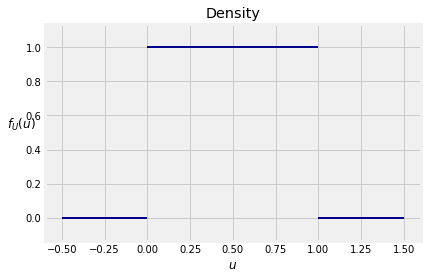

In [2]:
# NO CODE
plt.axes().set_aspect('equal','datalim')
plt.plot([0, 1], [1, 1], color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [0, 0], color='darkblue', lw=2)
plt.xlabel('$u$')
plt.ylabel('$f_U(u)$', rotation=0)
plt.title('Density');

Areas under $f_U$ are rectangles, so it follows easily that the probability of an interval is its length relative to the total length of the unit interval, which is 1. For example, for every pair $u_1$ and $u_2$ with $u_1 < u_2$,

$$
P(u_1 < U < u_2) ~ = ~ u_2 - u_1
$$
Equivalently, the cdf of $U$ is
$$
F_U(u) = 
\begin{cases}
0 ~~~ \text{if } u \le 0 \\
u ~~~ \text{if } 0 < u < 1 \\
1 ~~~ \text{if } u \ge 1
\end{cases}
$$

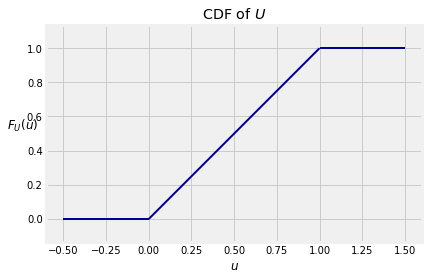

In [3]:
# NO CODE
plt.axes().set_aspect('equal','datalim')
plt.plot([0, 1], [0, 1], color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [1, 1], color='darkblue', lw=2)
plt.xlabel('$u$')
plt.ylabel('$F_U(u)$', rotation=0)
plt.title('CDF of $U$');

The expectation $E(U)$ doesn't require an integral either. It's the balance point of the density "curve", which is 1/2. But if you insist, you can integrate:

$$
E(U) ~ = ~ \int_0^1 u\cdot 1du ~ = ~ \frac{1}{2}
$$

For the variance, you do have to integrate. By the formula for expectation given at the start of this section,

$$
E(U^2) ~ = ~ \int_0^1 u^2\cdot 1du ~ = ~ \frac{1}{3}
~~~~~~~~~~~~~~~
Var(U) ~ = ~ \frac{1}{3} - \big{(}\frac{1}{2}\big{)}^2 ~ = ~ \frac{1}{12}
$$

### Uniform $(a, b)$ ###
Fix $a < b$. The uniform distribution on $(a, b)$ is flat over the interval $(a, b)$ and 0 elsewhere. Since its graph is a rectangle and the total area must be 1, the height of the rectangle is $\frac{1}{b-a}$.

So if $X$ has the uniform $(a, b)$ distribution, then the density of $X$ is

$$
f_X(x) ~ = ~ \frac{1}{b-a}, ~~~~ a < x < b
$$

and 0 elsewhere. Probabilities are still relative lengths, so the cdf of $X$ is

$$
F_X(x) ~ = ~ \frac{x - a}{b - a}, ~~~~ a < x < b
$$

The expectation and variance of $X$ can be derived with little calculation once you notice that $X$ can be created by starting with a uniform $(0, 1)$ random variabe $U$.

- **Step 1:** $U$ is uniform on $(0, 1)$
- **Step 2:** $(b-a)U$ is uniform on $(0, (b-a))$
- **Step 3:** $X = a + (b-a)U$ is uniform on $(a, b)$.

Now $X$ is a linear transformation of $U$, so

$$
E(X) ~ = ~ a + (b-a)E(U) ~ = ~ a + \frac{b-a}{2} ~ = ~ \frac{a+b}{2}
$$

which is the midpoint of $(a, b)$. Also,

$$
Var(X) ~ = ~ \frac{(b-a)^2}{12} 
$$

### Example: Random Discs ###
A screen saver chooses a random radius uniformly in the interval $(0, 2)$ centimeters and draws a disc with that radius. Then it chooses another radius in the same way, independently of the first, and draws another disc. And so on.

**Question 1.** Let $S$ be the area of the first disc. Find $E(S)$.

**Answer.** Let $R$ be the radius of the first disc. Then $S = \pi R^2$. So

$$
E(S) ~ = ~ \pi E(R^2) ~ = ~ \pi\big{(}Var(R) + (E(R))^2\big{)} ~ = ~ 
\pi\big{(} \frac{4}{12} + 1^2\big{)} ~ = ~ 4.19 ~ cm^2
$$



In [4]:
np.pi * (4/12 + 1)

4.1887902047863905

**Question 2.** Let $\bar{R}$ be the average radius of the first 100 discs. Find a number $c$ so that $P(\lvert \bar{R} - 1 \rvert < c) \approx 99\%$.

**Answer.** Let $R_1, R_2, \ldots , R_{100}$ be the first 100 radii. These are i.i.d. random variables, each with mean 1 and variance $4/12$. So $E(\bar{R}) = 1$ and 

$$
SD(\bar{R}) = \frac{\sqrt{4/12}}{\sqrt{100}} ~ = ~ 0.0577 ~ \mbox{cm}
$$ 

In [5]:
sd_rbar = ((4/12)**0.5)/(100**0.5)
sd_rbar

0.057735026918962574

By the Central Limit Theorem, the distribution of $\bar{R}$ is approximately normal. Let's draw it using `Plot_norm`.

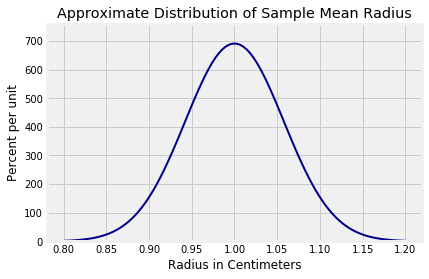

In [6]:
Plot_norm((0.8, 1.2), 1, sd_rbar)
plt.xlabel('Radius in Centimeters')
plt.title('Approximate Distribution of Sample Mean Radius');

We are looking for $c$ such that there is about 99% chance that $\bar{R}$ is in the interval $(1-c, 1+c)$. Therefore $1 + c$ is the 99.5th (not 99th) percent point of the curve above, from which you can find $c$.

In [7]:
c = stats.norm.ppf(0.995, 1, sd_rbar) - 1
c

0.14871557417904846

There is another way to find $c$. Since $c$ is a distance from the mean, $c = zSD(\bar{R})$ where $z$ is such that the area between $-z$ and $z$ under the standard normal curve is about 99%. This $z$ is the 99.5th percent point of the standard normal curve.

In [8]:
z = stats.norm.ppf(0.995)
z

2.5758293035489004

In [9]:
c = z*sd_rbar
c

0.14871557417904838

That's the same value of $c$ that we got by the previous method. The graph below shows the corresponding area of 99%.

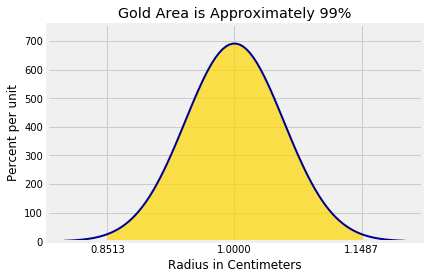

In [10]:
Plot_norm((0.8, 1.2), 1, sd_rbar, left_end = 1-c, right_end = 1+c)
plt.xticks([1-c, 1, 1+c])
plt.xlabel('Radius in Centimeters')
plt.title('Gold Area is Approximately 99%');